In [6]:
import cv2 as cv


In [7]:
img = cv.imread(cv.samples.findFile("apple.jpg"))

In [8]:
# img is an np array with dim 440 x 550 and 3 channels (BGR)
# Why BGR? https://learnopencv.com/why-does-opencv-use-bgr-color-format/
img.shape

(440, 550, 3)

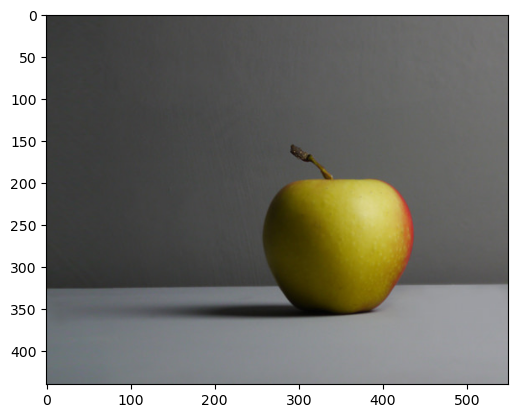

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [10]:
img

array([[[ 58,  56,  56],
        [ 58,  56,  56],
        [ 57,  55,  55],
        ...,
        [116, 118, 118],
        [116, 118, 118],
        [118, 118, 118]],

       [[ 58,  56,  56],
        [ 56,  56,  56],
        [ 56,  56,  56],
        ...,
        [116, 118, 118],
        [116, 118, 118],
        [118, 118, 118]],

       [[ 56,  56,  56],
        [ 56,  56,  56],
        [ 56,  56,  56],
        ...,
        [116, 118, 119],
        [116, 118, 119],
        [118, 117, 119]],

       ...,

       [[112, 110, 102],
        [112, 110, 102],
        [113, 110, 102],
        ...,
        [159, 154, 153],
        [159, 154, 153],
        [158, 154, 153]],

       [[113, 110, 102],
        [113, 110, 102],
        [113, 110, 102],
        ...,
        [158, 153, 152],
        [158, 153, 152],
        [157, 153, 152]],

       [[115, 110, 101],
        [115, 110, 101],
        [115, 110, 101],
        ...,
        [158, 153, 152],
        [158, 153, 152],
        [157, 153, 152]]

In [11]:
# accessing & modifying individual pixel

#not good practice
px = img[2,2,2]

#better
#why? 
"""
numpy.ndarray.item() copies an element of an array to a standard Python scalar and returns it.
To put it in other words, calling img.item(i) gets you a copy of the value represented by the index i in your array, 
similar to img[i] but with the difference that it returns it as a Python scalar instead of an array. 
Following the docs, getting a Python scalar is useful to speed up access to the elements of the array and 
doing arithmetic on the values taking advantage of Python's optimized math.
https://stackoverflow.com/questions/54174102/how-does-the-item-function-works-when-accessing-pixel-values
"""
px = img.item(10,10,2)
px = img.itemset((10,10,2),100)

In [12]:
px

In [14]:
import numpy as np
import cv2 as cv

# integrated videocam/usb webcam not supported in WSL2, will need to use windows to access video feed

cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
 
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
 
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

Cannot open camera
Can't receive frame (stream end?). Exiting ...


[ WARN:0@4705.483] global cap_v4l.cpp:997 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@4705.485] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range
